# Rapidly measuring spatial accessibility of COVID-19 healthcare resources: a case study of Illinois, USA

This notebook briefly walks through calculating spatial accessibility to hospital ventilators in Chicago, IL. This work uses the code from the following paper:

> Kang, JY., Michels, A., Lyu, F. et al. Rapidly measuring spatial accessibility of COVID-19 healthcare resources: a case study of Illinois, USA. Int J Health Geogr 19, 36 (2020). https://doi.org/10.1186/s12942-020-00229-x

**Paper Authors:** Jeon-Young Kang, Alexander Michels, Fangzheng Lyu, Shaohua Wang, Nelson Agbodo, Vincent L. Freeman & Shaowen Wang

**Notebook Authors:** Alexander Michels, Zimo Xiao, Anand Padmanabhan, Zhiyu Li, Shaowen Wang, Mit Kotak and Taylor Ziegler

In [1]:
import contextily as cx
import geopandas as gpd
import os

In [2]:
from cybergis_compute_client import CyberGISCompute

cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")

In [3]:
cybergis.show_ui()

In [4]:
download_path = cybergis.recentDownloadPath
print(f"Our outputs are at {download_path}")

Our outputs are at /home/jovyan/work/globus_download_1658163317OGclc


In [5]:
!ls {download_path}

map.png  result.geojson  slurm_log


In [6]:
result_path = os.path.join(download_path, "result.geojson")
gdf = gpd.read_file(result_path)
gdf.head()

,left,top,right,bottom,id,area,hospital_vents,geometry
0,440843.416087,4.638515e+06,441420.766356,4.638015e+06,4158,216661.173,0.000624,"POLYGON ((440843.416 4638265.403, 440987.754 4..."
1,440843.416087,4.638015e+06,441420.766356,4.637515e+06,4159,216661.168,0.000626,"POLYGON ((440843.416 4637765.403, 440987.754 4..."
2,440843.416087,4.639515e+06,441420.766356,4.639015e+06,4156,216661.169,0.000646,"POLYGON ((440843.416 4639265.403, 440987.754 4..."
3,440843.416087,4.639015e+06,441420.766356,4.638515e+06,4157,216661.171,0.000637,"POLYGON ((440843.416 4638765.403, 440987.754 4..."
4,440843.416087,4.640515e+06,441420.766356,4.640015e+06,4154,216661.171,0.000635,"POLYGON ((440843.416 4640265.403, 440987.754 4..."


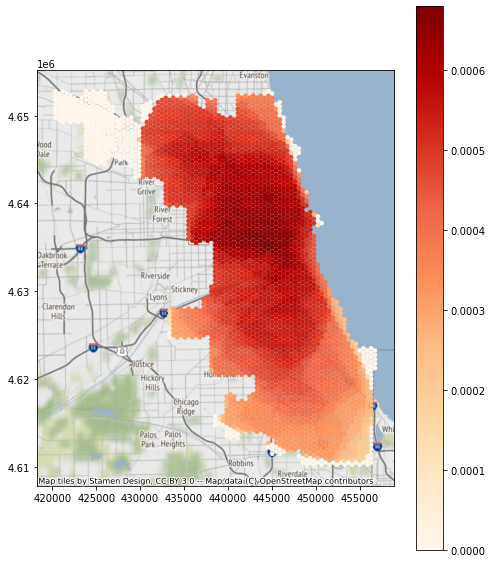

In [7]:
ax = gdf.plot(column="hospital_vents", cmap="OrRd", figsize=(8,10), legend=True)
cx.add_basemap(ax, crs=gdf.crs.to_string())

In [ ]:
gdf.explore(column="hospital_vents", cmap="OrRd")